In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import torch

'''
Training Time per Batch Stick Figure
'''


'\nTraining Time per Batch Stick Figure\n'

In [ ]:
'''
model parameter checkpoint
model : resnet 8x4
dataset loader
'''
import sys
import os
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from utils.train import load_dataset
dir = os.getcwd()
ROOT = os.path.dirname(dir)
sys.path.append(ROOT)


def get_tsne(model_path, set="none"):
    train_loader, val_loader = load_dataset(bz=64)
    num_classes=100

    all_features, all_labels = [], []
    with torch.no_grad():
        for i, (data, labels) in tqdm(enumerate(val_loader)):
            data = data.to(device)
            labels = labels.to(device)
            if set == "none":
                from models.resnet import resnet8x4
                model, _ = resnet8x4(num_classes=100)
                model.to(device)
                
                model_state_dict = torch.load(model_path)
                model.load_state_dict(model_state_dict)
                outputs, features = model(data)
            else:
                from SDD_models.resnet import resnet8x4 
                model, _ = resnet8x4(num_classes=100)
                model.to(device)
                
                model_state_dict = torch.load(model_path)
                model.load_state_dict(model_state_dict)
                outputs, features, scores = model(data)
            '''
            model의 pooled_feat 만 추출해와서 이를 쫙 펼침
            '''
            all_features.append(features['pooled_feat'].data.cpu().numpy())
            all_labels.append(labels.data.cpu().numpy())
    all_features = np.concatenate(all_features, 0)
    all_labels = np.concatenate(all_labels, 0)

    tsne = TSNE()
    all_features = tsne.fit_transform(all_features)
    plot_features(all_features, all_labels, num_classes)

def plot_features(features, labels, num_classes):
    colors = ['C'+ str(i) for i in range(num_classes)]
    plt.figure(figsize=(6, 6))
    for l in range(num_classes):
        plt.scatter(
            features[labels == l, 0],
            features[labels == l, 1],
            c=colors[l], s=1, alpha=0.4
        )
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [ ]:
path = os.getcwd()
parent_path = os.path.dirname(path)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_38584\4171088724.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
1

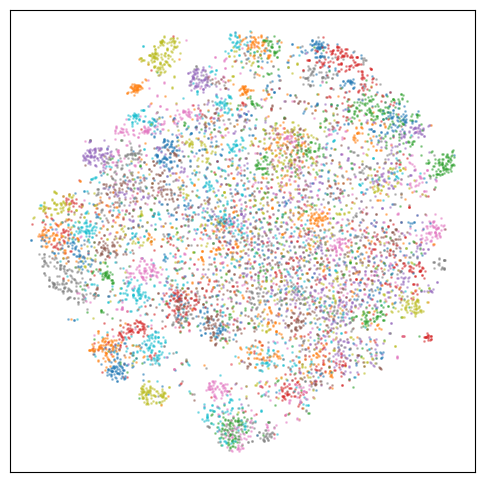

In [16]:
get_tsne(STU_PATH)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_8864\4171088724.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
15

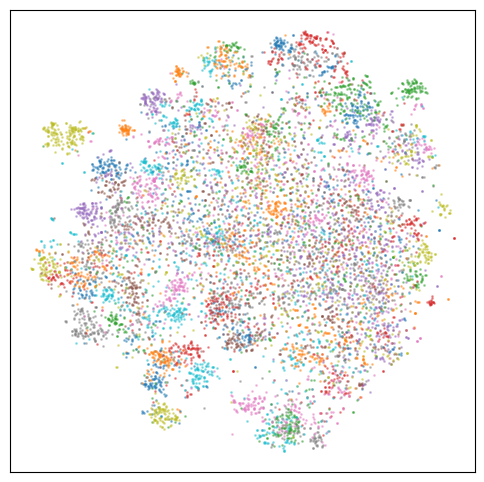

In [27]:
get_tsne(KD_PATH)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_8864\4171088724.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
15

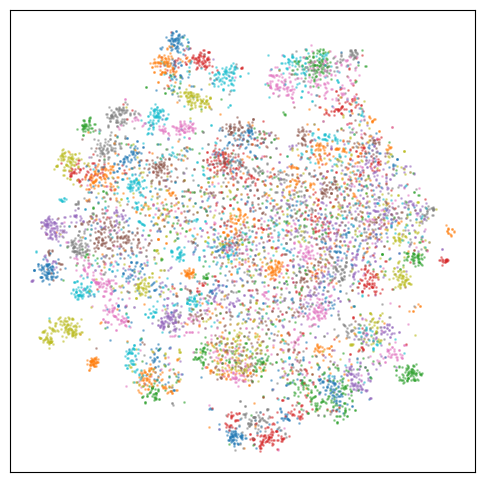

In [29]:
get_tsne(MLKD_PATH)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_36016\4171088724.py:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
1

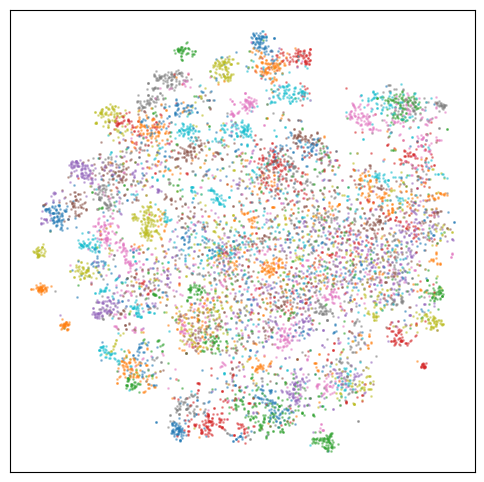

In [4]:
get_tsne(SDD_PATH, set="SDD")

In [5]:
get_tsne(RKD_PATH)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_36016\4171088724.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
0

TypeError: Expected state_dict to be dict-like, got <class 'int'>.

In [ ]:
get_tsne(ReviewKD_PATH)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


0it [00:00, ?it/s]C:\Users\HDD\AppData\Local\Temp\ipykernel_38584\4171088724.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load(model_path)
1

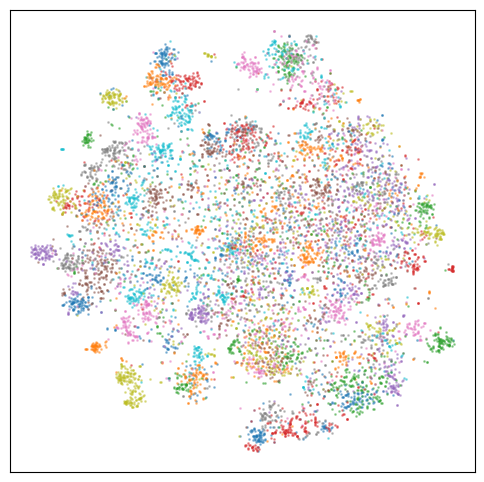

In [12]:
get_tsne(SKD_PATH)